# Predicción de default financiero usando métodos de aprendizaje automático
### Implementación del modelo y entrenamiento

**Estudiantes**

Federico Ocampo Ortiz, Ing. Sistemas. e-mail: federico.ocampoo@udea.edu.co

Andrés Felipe Orrego Quintero. Ing. Sistemas. e-mail: andres.orrego2@udea.edu.co

**Asesora**

Maria Bernarda Salazar Sánchez, PhD. e-mail: bernarda.salazar@udea.edu.co

In [9]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Separación dataset
from sklearn import metrics # Metricas para la evaluación
from sklearn.neighbors import LocalOutlierFactor

#Creación de modelos
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import ComplementNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc

In [10]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 8))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax, facecolor='midnightblue', edgecolor='black')
        title_obj = ax.set_title(var_name+" Distribution")
        plt.setp(title_obj, color='black')                     # Individual title colours.

        # remove grid lines
        ax.grid(False)

        ax.xaxis.label.set_color('black')
        ax.yaxis.label.set_color('black')
        ax.tick_params(axis='x', colors='black')       #set the color of xticks
        ax.tick_params(axis='y', colors='black')       #set the color of yticks

    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


# Dataset

In [11]:
#Se crea un dataframe d con los datos obtenidos de archivo de entrada
d=pd.read_csv('data/Preprocessed.csv')
d.head(10)

,Incumplimiento,TasaUtilizacionLineasRotativas,Edad,Mora30a59dias,RazonDeudaMensual,IngresoMensual,CantidadCreditosActivos,MoraMayorA90,CantidadCreditosDeVivienda,Mora60a89dias,CantidadDependientes,OcurrenciasMora
0,1,0.766127,0.272727,0.153846,0.000201,0.45600,0.228070,0.000000,0.30,0.0,0.50,0.105263
1,0,0.957151,0.215909,0.000000,0.000030,0.13000,0.070175,0.000000,0.00,0.0,0.25,0.000000
2,0,0.658180,0.193182,0.076923,0.000021,0.15210,0.035088,0.058824,0.00,0.0,0.00,0.105263
3,0,0.233810,0.102273,0.000000,0.000009,0.16500,0.087719,0.000000,0.00,0.0,0.00,0.000000
4,0,0.213179,0.602273,0.000000,0.000094,0.17500,0.052632,0.000000,0.05,0.0,0.25,0.000000
5,0,0.754464,0.204545,0.000000,0.000052,0.17500,0.140351,0.000000,0.00,0.0,0.00,0.000000
6,0,0.116951,0.068182,0.000000,0.011500,0.27080,0.035088,0.000000,0.00,0.0,0.00,0.000000
7,0,0.644226,0.102273,0.000000,0.000077,0.12500,0.087719,0.000000,0.00,0.0,0.00,0.000000
8,0,0.018798,0.340909,0.000000,0.000133,0.32505,0.122807,0.000000,0.10,0.0,0.50,0.000000
9,0,0.010352,0.284091,0.000000,0.000075,0.62270,0.228070,0.000000,0.10,0.0,0.50,0.000000


In [5]:
d.describe()

,Incumplimiento,TasaUtilizacionLineasRotativas,Edad,Mora30a59dias,RazonDeudaMensual,IngresoMensual,CantidadCreditosActivos,MoraMayorA90,CantidadCreditosDeVivienda,Mora60a89dias,CantidadDependientes,OcurrenciasMora
count,140742.000000,140742.000000,140742.000000,140742.000000,140742.000000,140742.000000,140742.000000,140742.000000,140742.000000,140742.000000,140742.000000,140742.000000
mean,0.058867,0.301405,0.358040,0.017372,0.060150,0.297039,0.147343,0.004643,0.049041,0.005151,0.174893,0.019023
std,0.235376,0.337377,0.169160,0.050873,0.172924,0.167179,0.089137,0.026077,0.052463,0.027586,0.258636,0.053508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.027972,0.227273,0.000000,0.000044,0.192500,0.087719,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.141092,0.352273,0.000000,0.000091,0.270800,0.140351,0.000000,0.050000,0.000000,0.000000,0.000000
75%,0.000000,0.514463,0.477273,0.000000,0.000202,0.364537,0.192982,0.000000,0.100000,0.000000,0.250000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#dividiendo el df en entradas y salidas
X = d.drop(columns=['Incumplimiento'])
y = d['Incumplimiento']

In [13]:
# Se hace la separación del dataset para entrenamiento y evaluación.
# 30% sería para evaluación y 70% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y.values.reshape(-1,1),
    train_size = 0.7,
    random_state=282,
    shuffle=True
)

# Implementación del modelo
## Linea Base
Primero iniciamos con un clasificador dummy que predice sin tener en cuenta las variables de entradas. En este caso predice que todas las salidas son 0, lo que significa que todas las personas pagan sus créditos. Este clasificador nos sirve como base para comparar los resultados de los otros clasificadores.

In [14]:
# implement naive model to check the accuracy
modelDummy = DummyClassifier(strategy="stratified")
modelDummy.fit(X_train, y_train)
modelDummy.score(X_test, y_test)

0.8897046633351491

In [16]:
modelLR = LogisticRegression( random_state=42, max_iter=1000 )
modelLR.fit(X_train, y_train)

# score of the model
print(f"Train score: {modelLR.score(X_train, y_train)}")
print(f"Test score: {modelLR.score(X_test, y_test)}")


c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.9435844862412327
Test score: 0.9429694716149966


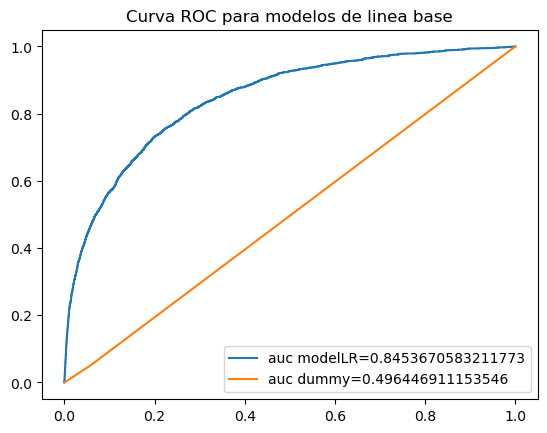

In [17]:
#show roc curve for model dummy and logistic regression in same plot
y_pred_proba = modelLR.predict_proba(X_test)[::,1]

fpr, tpr, th = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc_metric = auc(fpr, tpr)

plt.plot(fpr, tpr,label="auc modelLR="+str(auc_metric))

y_pred_proba = modelDummy.predict_proba(X_test)[::,1]
fpr, tpr, th = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc_metric = auc(fpr, tpr)

plt.plot(fpr, tpr,label="auc dummy="+str(auc_metric))

plt.legend(loc=4)
plt.title('Curva ROC para modelos de linea base')
plt.show()


## Selección de Modelo
Se realiza la implementación de diferentes modelos con el fin de evaluar cuál tiene mejores resultados para la predicción. Para esto se tiene en cuenta la metrica curva roc-auc, f1-score, precission y accuracy. 


In [18]:
# Entrenamiento de multiples modelos

# Maquinas de soporte vectorial
modelSVC       = svm.SVC(kernel='linear', probability = True).fit(X_train, y_train)
# Clasificador de K Neighbors
modelknn       = neighbors.KNeighborsClassifier(n_neighbors = 31).fit(X_train, y_train)
# Complemento del Naive Bayes
modelComplNB   = ComplementNB().fit(X_train, y_train)
# Arboles de decision
modelTreeClas  = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
# Gradient Boosting
modelGD = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05,
                                     max_depth=5, random_state=231) \
                                     .fit(X_train, y_train)
# Random forest
modelRanForest = RandomForestClassifier(n_estimators=100, max_depth=5, max_features = 'auto', criterion = 'gini', random_state=0).fit(X_train, y_train)
# Redes neuronales - Prospectos
ModelNN        = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=0).fit(X_train, y_train)
# ModelXGB
modelXGB = XGBClassifier( n_estimators = 150, learning_rate=0.05, max_depth = 5) \
                .fit(X_train, y_train)

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

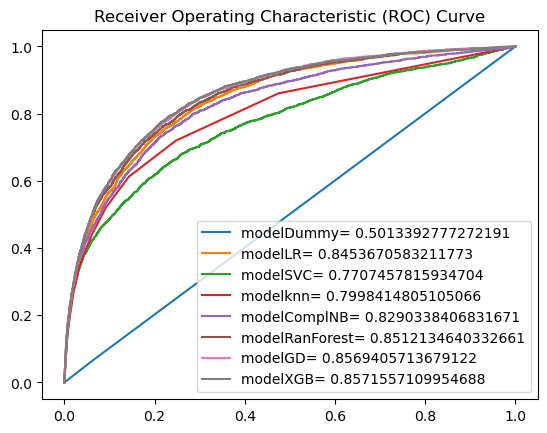

In [19]:
models = [
    ('modelDummy', modelDummy),
    ('modelLR', modelLR),
    ('modelSVC', modelSVC),
    ('modelknn', modelknn),
    ('modelComplNB', modelComplNB),
    ('modelRanForest', modelRanForest),
    ('modelGD', modelGD),
    ('modelXGB', modelXGB)
]

for name, model in models:
    # aqui se hace la curva roc con X_train
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, th = roc_curve(y_test,  y_pred_proba, pos_label=1)
    auc_metric = auc(fpr, tpr)

    plt.plot(fpr, tpr,label=name+'= '+str(auc_metric))
    plt.legend(loc=4)

plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico

In [20]:
# Validación cruzada en todos los modelos
cv = 6
scoring = ['accuracy', 'precision', 'recall', 'f1']

models = [
    ('modelRanForest', modelRanForest),
    ('modelknn',modelknn),
    ('modelGD', modelGD),
    ('modelXGB', modelXGB),
    ('modelLR',modelLR)
]

cv_df = pd.DataFrame()

for name, model in models:
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = name
    cv_df = pd.concat([cv_df, model_scores], ignore_index=True)

column_order = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
cv_df = cv_df.reindex(columns=column_order)

cv_df

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

,model_name,test_accuracy,test_precision,test_recall,test_f1
0,modelRanForest,0.942874,0.603015,0.086894,0.151899
1,modelRanForest,0.942917,0.600000,0.091238,0.158391
2,modelRanForest,0.943087,0.613861,0.089790,0.156665
3,modelRanForest,0.942874,0.609626,0.082549,0.145408
4,modelRanForest,0.944579,0.728814,0.093411,0.165597
5,modelRanForest,0.943087,0.605634,0.093478,0.161959
6,modelknn,0.942235,0.539634,0.128168,0.207139
7,modelknn,0.942320,0.541176,0.133237,0.213829
8,modelknn,0.941595,0.517460,0.118030,0.192217
9,modelknn,0.942533,0.556314,0.118030,0.194743


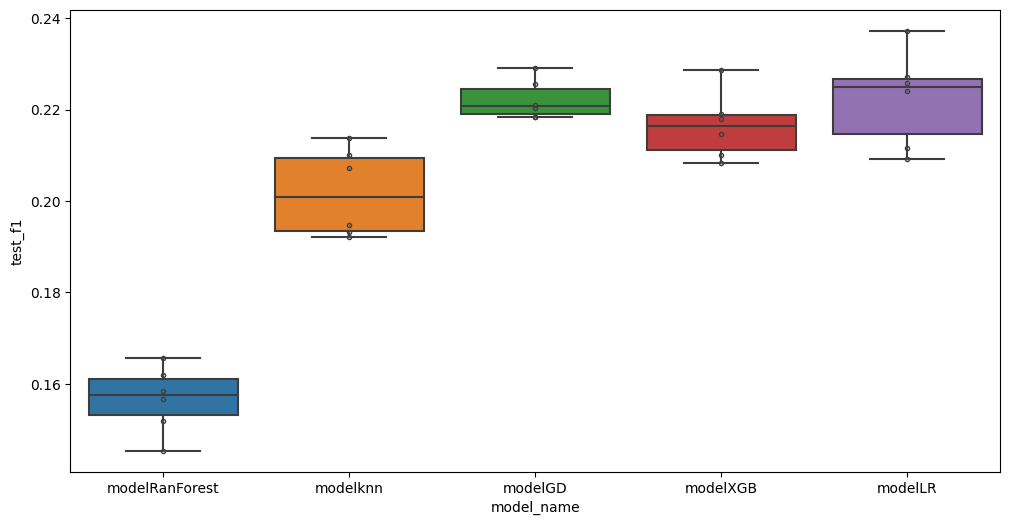

In [21]:
# Gráfica de f1-score de los modelos

fig = plt.figure(figsize=(12,6))

sns.boxplot(x='model_name', y='test_f1', data=cv_df)
sns.stripplot(x='model_name', y='test_f1', data=cv_df,
              size=1, jitter=False, edgecolor="gray", linewidth=3)
plt.show()